# Anotações sobre o primeiro capítulo
Feito por Arthur Lorencini Bergamaschi


## Por que diabos entender bem essa parte?
Você precisa entender bem essa parte para não sofrer na hora dos trabalhos. É muito importante ter os conceitos de python, matplotlib, PIL e numpy para não agarrar com coisas idiotas no trabalho.

# Manipulando imagens

Podemos utilizar o PIL ou o opencv2 para carregar as imagens. Lembre-se de carregar as imagens para o colab através do ícone de pasta ali no canto esquerdo.

Podemos plotar também utilizando matplotlib.pyplot.
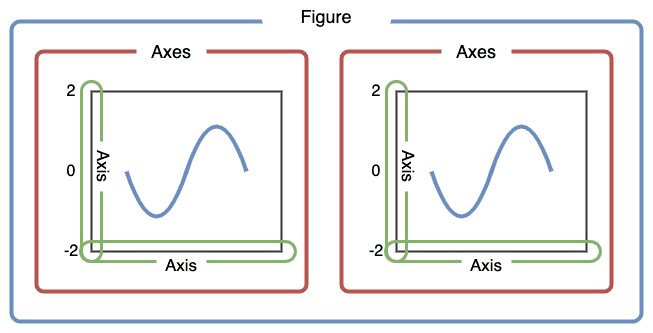
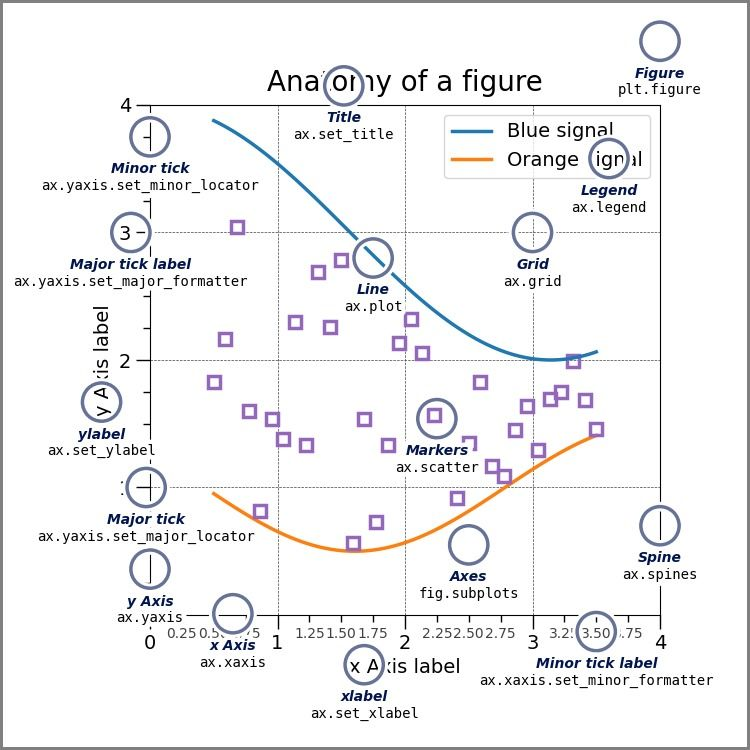

## basic_image_functions.ipynb

To open and show an image you can use PIL and matplotlib as shown in the following code.
If you uncomment the two last lines, the axis values will desapear.

In [ ]:
#@title Baixando uma imagem na internet para usarmos de exemplo
!wget http://pudim.com.br/pudim.jpg

--2023-08-29 16:27:46--  http://pudim.com.br/pudim.jpg
Resolving pudim.com.br (pudim.com.br)... 54.207.20.104
Connecting to pudim.com.br (pudim.com.br)|54.207.20.104|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27585 (27K) [image/jpeg]
Saving to: ‘pudim.jpg’

pudim.jpg           100%[===================>]  26.94K  67.8KB/s    in 0.4s    

2023-08-29 16:27:47 (67.8 KB/s) - ‘pudim.jpg’ saved [27585/27585]



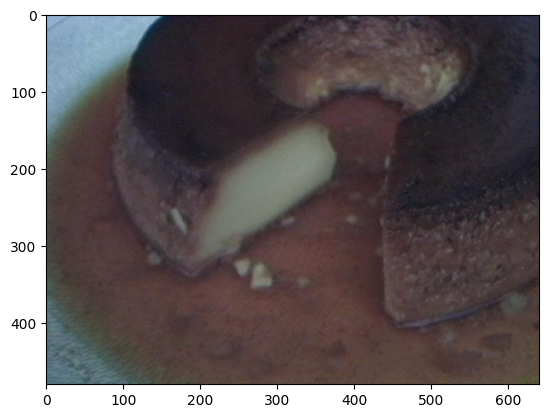

In [ ]:
#@title Abrindo um arquivo .jpg e mostrando via matplotlib

# Importando as bibliotecas
from PIL import Image
import matplotlib.pyplot as plt

# Definindo o tipo de backend que o matplotlib vai utilizar
%matplotlib inline

# Abrindo a imagem
filepath = "pudim.jpg"
im = Image.open(filepath)
plt.imshow(im)


Another way to show an image is to use the display method.

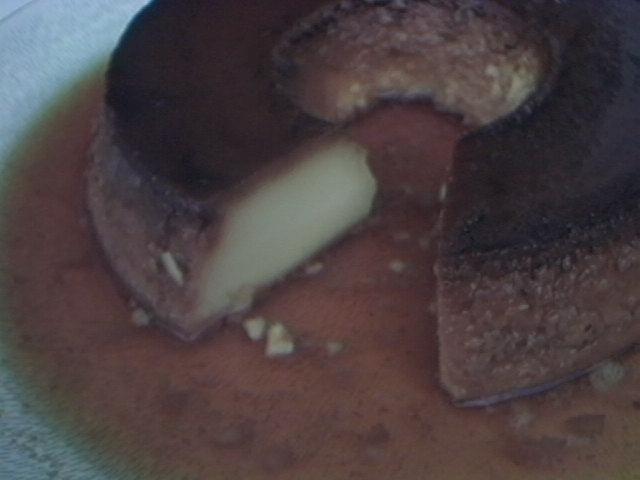

In [ ]:
#@title Mostrando a imagem via PIL
from PIL import Image
im = Image.open(filepath)
display(im)

The following code shows how to convert an image to gray scale and show both the original and gray scale image in the same figure using "subplot".
Also note the alternative way to remove the axis in the second subplot.

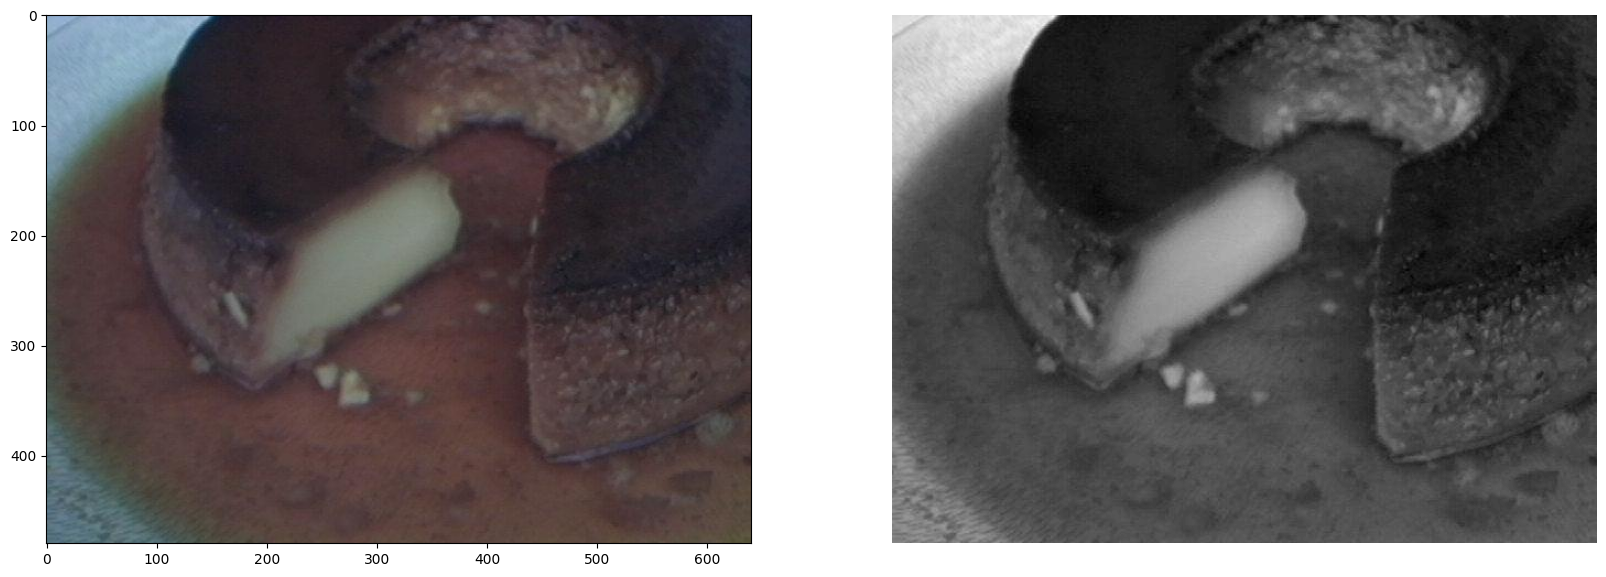

In [ ]:
#@title Criando as figuras e fazendo subplots via pyplot.
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
plt.imshow(im)
#plt.xticks([])
#plt.yticks([])
#plt.axis('off')

# L é de Luminecência (ou seja, só intensidade)
im2 = im.convert('L')
# Inserindo no subplot.
fig.add_subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')

plt.show()


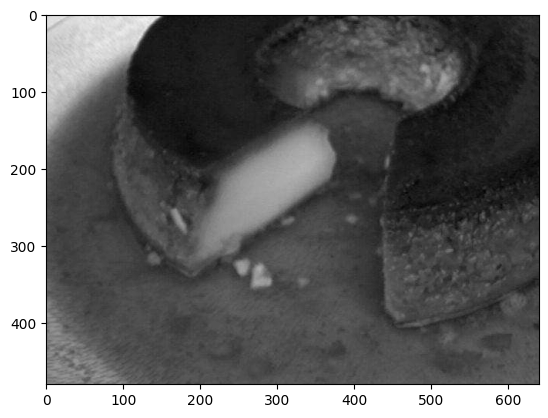

In [ ]:
#@title Salvando as imagens na máquina do colab.

im2 = im.convert('L')
im2.save('teste.jpg')

im = Image.open('teste.jpg')
plt.imshow(im,cmap='gray')

Rotate an image according to an angle described in degress.

(-0.5, 639.5, 479.5, -0.5)

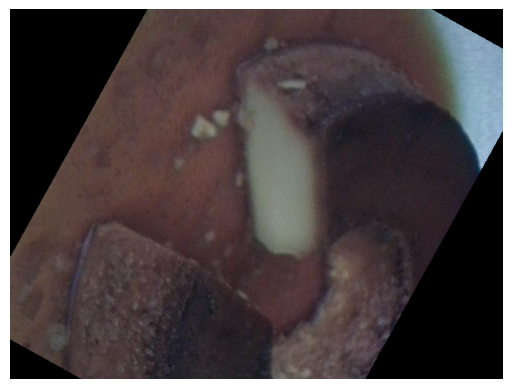

In [ ]:
#@title Rotacionando a imagem {run:"auto"}
angle = 241 #@param {type:"slider", min:0, max:360, step:1}
im = Image.open(filepath)
im2 = im.rotate(angle)
plt.imshow(im2)
plt.axis('off')



Let's now read the size of an image and resize it.

Width:  640  Height:  480
Width:  320  Height:  160


([], [])

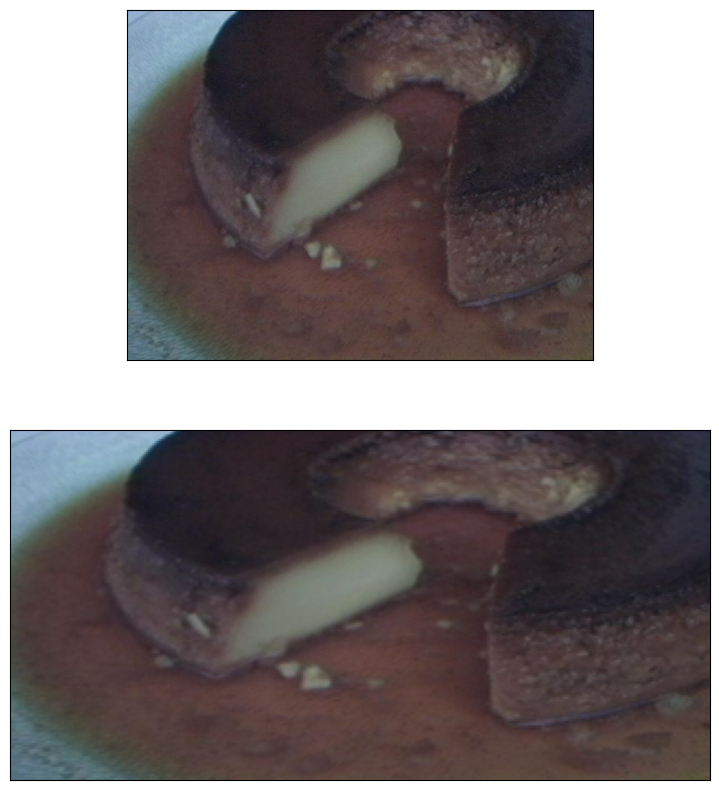

In [ ]:
#@title Vendo o tamanho da imagem
im = Image.open(filepath)
width, height = im.size
print ("Width: ", width, " Height: ", height)

im2 = im.resize((int(width/2),int(height/3)))

width, height = im2.size
print ("Width: ", width, " Height: ", height)


fig = plt.figure(figsize=(15,10))
fig.add_subplot(2,1,1)
plt.imshow(im)
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,1,2)
plt.imshow(im2)
plt.xticks([])
plt.yticks([])


As the next step we are going to crop a region from the image, rotate and paste it in the same image.


([], [])

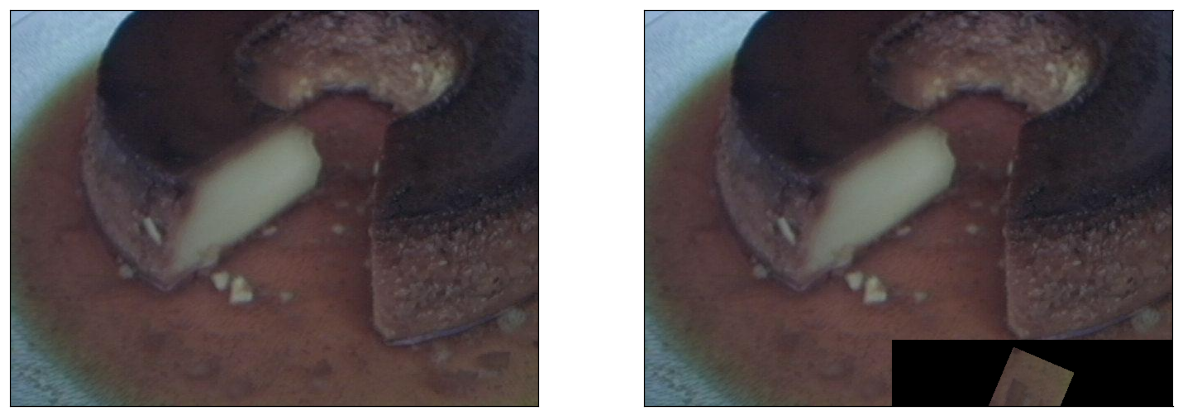

In [ ]:
#@title Abrindo uma imagem e rodando um trecho

im = Image.open(filepath)

# define the box to be cropped
box = (300,400,800,700)

# make a copy of the original image
im2 = im.copy()
# crop the part of the image inside the box
region = im2.crop(box)



# you can rotate using one of the following commands:
region = region.rotate(67)
#region = region.transpose(Image.ROTATE_180)

im2.paste(region,box)

fig = plt.figure(figsize=(15,30))
fig.add_subplot(1,2,1)
plt.imshow(im)
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(im2)
plt.xticks([])
plt.yticks([])




# Manipulando 3D

## 3d_2d_plots_matplotlib.ipynb

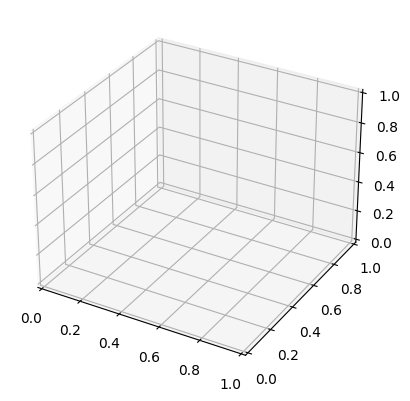

In [ ]:
#@title Trabalhando com 3D para o trabalho
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Creating a separate 3D figure
fig = plt.figure()
ax0 = plt.axes(projection='3d')

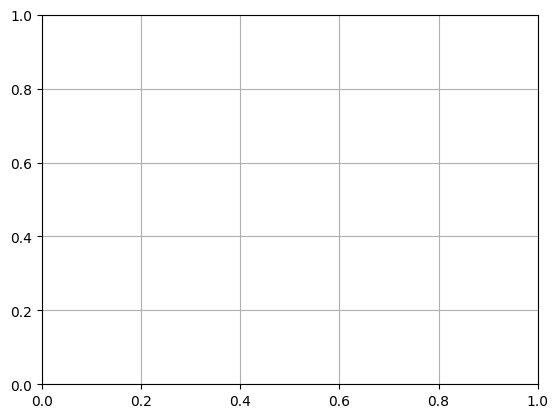

In [ ]:
#@title Criando figuras (as 'vistas') separadas em 2D
fig = plt.figure()
ax0 = plt.axes()
ax0.grid()

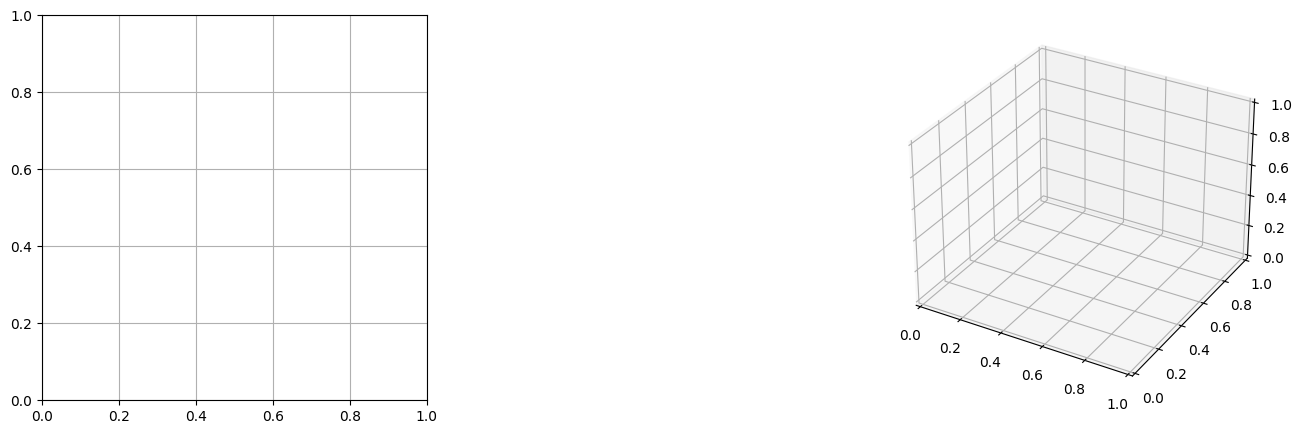

In [ ]:
#@title Criando subfiguras (add_subplot) em 2D e 3D
fig = plt.figure(figsize=[20,5])
ax1 = fig.add_subplot(1,2,1)
ax1.set_aspect('equal')
ax1.grid()
ax2 = fig.add_subplot(1,2,2, projection='3d')
#ax2.grid(False)

In [ ]:
#@title Criando os dados que serão plotados
import numpy as np
# Data for a three-dimensional line
# Array of z-coordinates
zline = np.linspace(0, 15, 1000)
# Array of x-coordinates calculated as the sine of z-values
xline = np.sin(zline)
# Array of y-coordinates calculated as the cosine of z-values
yline = np.cos(zline)

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)  # numpy.random.random returns random floats in the half-open interval [0.0, 1.0)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # numpy.random.randn returns a sample (or samples) from the “standard normal” distribution
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

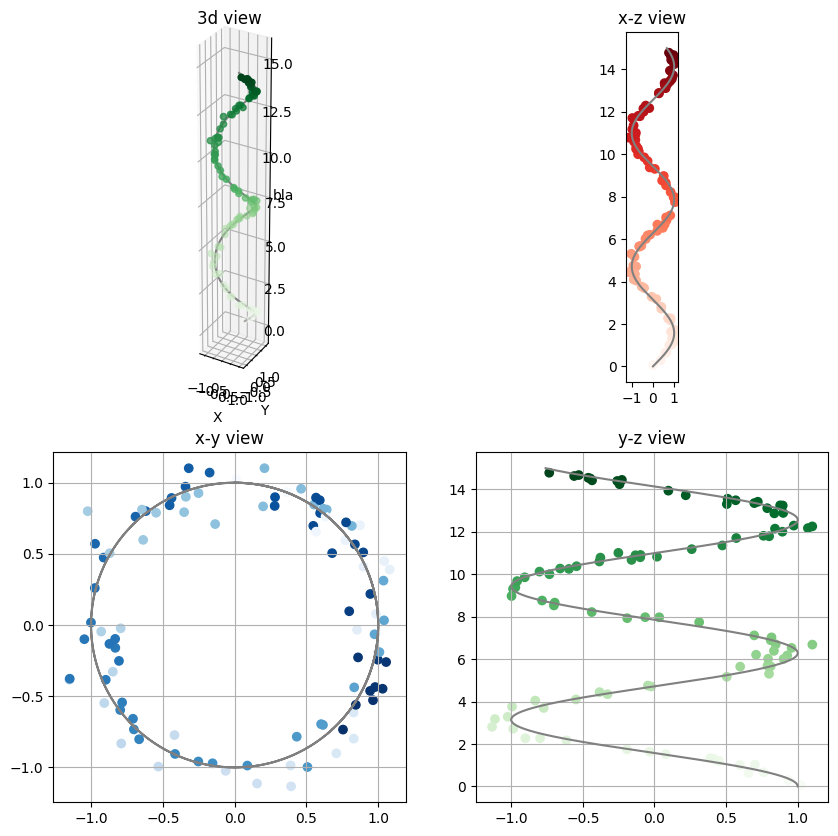

In [ ]:
#@title Plotando os dados em subfigures (add_subplot)
#

fig = plt.figure(figsize=(10,10))

# No subplot 2x2 (Linha x Coluna), você vai escolher o primeiro subplot

# 3D plot
ax1 = fig.add_subplot(2,2,1,projection='3d')
ax1.set_title("3d view")
ax1.plot3D(xline, yline, zline, 'gray')
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
#ax1.plot3D(xdata, ydata, zdata, 'r.')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("bla")
ax1.set_aspect('equal')

# 2D plot - # No subplot 2x2, você vai escolher o segundo subplot
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("x-z view")
ax2.plot(xline,zline,'gray')
ax2.scatter(xdata,zdata,c=zdata,cmap='Reds')
ax2.set_aspect('equal')

# 2D plot # No subplot 2x2, você vai escolher o terceiro subplot
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("x-y view")
ax3.plot(xline,yline,'gray')
ax3.scatter(xdata,ydata,c=zdata,cmap='Blues')
ax3.grid()

# 2D plot # No subplot 2x2, você vai escolher o quarto subplot
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("y-z view")
ax4.plot(yline,zline,'gray')
ax4.scatter(ydata,zdata,c=zdata,cmap='Greens')
ax4.grid()
#ax4.set_aspect('equal')
#ax4.set_xlim([1,-1])

# Mostrando todas as figuras com o plt
plt.show()


### Quiver
`quiver([X, Y], U, V, [C], **kwargs)`  

X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.

X:
 [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
Y:
 [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


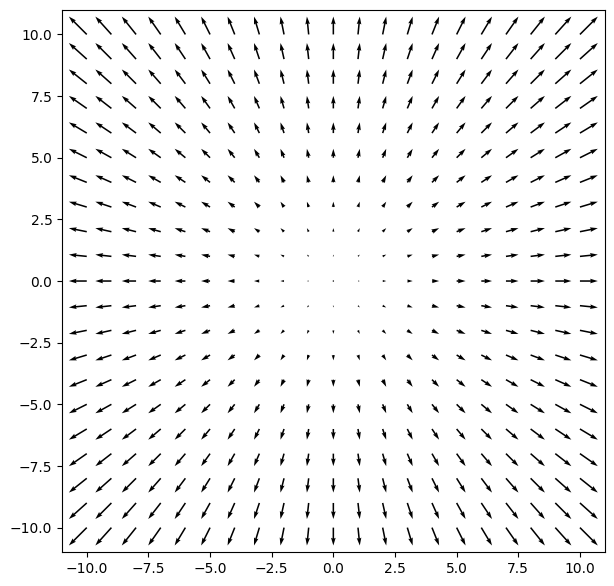

In [ ]:
#@title Criando vetores com ax.quiver
X = np.arange(-10, 11, 1) # coordenada da cauda
Y = np.arange(-10, 11, 1) # coordanada da ponta
U, V = np.meshgrid(X, Y) # coordenada das direções

print('X:\n',X)
print('Y:\n',Y)
#print('U:\n',U)


fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot()
q = ax.quiver(X, Y, U, V)
ax.set_aspect('equal')

plt.show()

In [ ]:
#@title Definindo as variáveis para criar o referencial do mundo

#origin point
point = np.array([[0],[0],[0]])

#base vector values
e1 = np.array([[1],[0],[0]]) # X
e2 = np.array([[0],[1],[0]]) # Y
e3 = np.array([[0],[0],[1]]) # Z

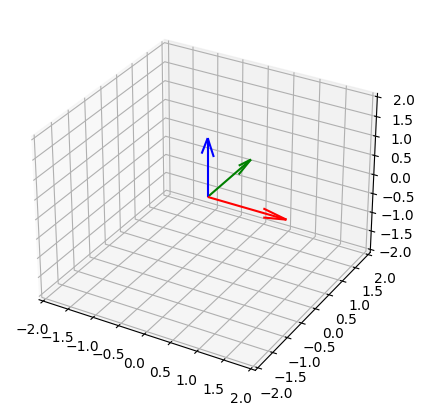

In [ ]:
#title Preparando o objeto Figure e plotando com o quiver
fig_quivers = plt.figure(figsize=(5,5))
ax0 = plt.axes(projection='3d')
ax0.set_xlim([-2,2])
ax0.set_ylim([-2,2])
ax0.set_zlim([-2,2])

# Ao escolher pivot='tail', fazemos que seja calda - ponta.

ax0.quiver(point[0],point[1],point[2], # coordenada da cauda
            e1[0],e1[1],e1[2], # coordenada da ponta
           color='red',pivot='tail',  length=1.5)
ax0.quiver(point[0],point[1],point[2],e2[0],e2[1],e2[2],color='green',pivot='tail',  length=1.5)
ax0.quiver(point[0],point[1],point[2],e3[0],e3[1],e3[2],color='blue',pivot='tail',  length=1.5)
plt.show()

Repeated Origin:
 [[0 0 0]
 [0 0 0]
 [0 0 0]] (3, 3)
Reference Frame:
 [[1 0 0]
 [0 1 0]
 [0 0 1]] (3, 3)


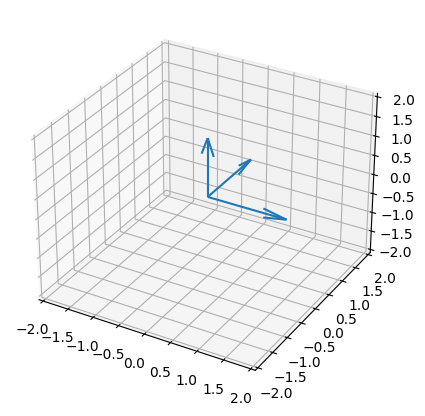

In [ ]:
# Another way to plot the axes, but all with the same color

# Stacking the origin and the axis in matrices
points = np.hstack((point,point,point))
base = np.hstack((e1,e2,e3))

print('Repeated Origin:\n',points,points.shape)
print('Reference Frame:\n',base,base.shape)

fig_quivers = plt.figure(figsize=(5,5))
ax1 = plt.axes(projection='3d')
ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])
ax1.set_zlim([-2,2])

ax1.quiver(points[0,:],points[1,:],point[2,:],base[0,:],base[1,:],base[2,:],length=1.5)
plt.show()